# Week 06 - Notebook

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data/CreditScoring.csv')

In [4]:
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


Can see that Categorical Variables are labelled as Numbers and Column Titles are not Lower Case

In [6]:
df.columns = df.columns.str.lower()
df.columns

Index(['status', 'seniority', 'home', 'time', 'age', 'marital', 'records',
       'job', 'expenses', 'income', 'assets', 'debt', 'amount', 'price'],
      dtype='object')

Read R code that shows how to pre-process Data.

levels(dd$Status) = c("good", "bad")

levels(dd$Home) = c("rent", "owner", "priv", "ignore", "parents", "other")

levels(dd$Marital) = c("single", "married", "widow", "separated", "divorced")

levels(dd$Records) = c("no_rec", "yes_rec")

levels(dd$Job) = c("fixed", "partime", "freelance", "others")

In [9]:
status_values = {
    1: 'ok', 
    2: 'default', 
    0: 'unk'
    }

df.status = df.status.map(status_values)

home_values = {
    1: 'rent', 
    2: 'owner', 
    3: 'priv',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
    }

df.home = df.home.map(home_values)

marital_values = {
    1: 'single', 
    2: 'married', 
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
    }

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no_rec', 
    2: 'yes_rec', 
    }

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed', 
    2: 'partime', 
    3: 'freelance',
    4: 'others',
    0: 'unk'
    }

df.job = df.job.map(job_values)

In [10]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no_rec,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no_rec,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes_rec,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no_rec,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no_rec,fixed,46,107,0,0,310,910


In [11]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


Per Preprocessing Doc - 99999999.0 is actually missing values.

Can see this is present in income assets and debt columns via Describe Function

In [13]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=np.nan)

In [14]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [15]:
print(df.status.value_counts()) #Target Variable Status, we have 1 Unknown (0)

df = df[df.status != 'unk'].reset_index(drop=True)

status
ok         3200
default    1254
unk           1
Name: count, dtype: int64


In [16]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [17]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [18]:
#Highlight all Defaulting Customers
y_train = (df_train.status == 'default').astype('int').values
y_val = (df_val.status == 'default').astype('int').values
y_test = (df_test.status == 'default').astype('int').values

In [19]:
del df_train['status']
del df_val['status']
del df_test['status']

In [20]:
len(df_val), len(df_test), len(df_train)

(891, 891, 2672)

## Decision Trees

- How a Decision Tree Looks
- Training a Decision Tree
- Overfitting
- Controlling size of a tree

In [22]:
#example of a decision tree
def assess_risk(client):
    if client['records'] == 'yes':
        if client['job'] == 'parttime':
            return 'default'
        else:
            return 'ok'
    else:
        if client['assets'] > 6000: 
            return 'ok'
        else:
            return 'default'

In [23]:
xi = df_train.iloc[0].to_dict() #first customer

In [24]:
assess_risk(xi)

'ok'

In [25]:
#Binary Classification Problem
from sklearn.tree import DecisionTreeClassifier 
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [26]:
train_dicts = df_train.fillna(0).to_dict(orient='records')

In [27]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [28]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [29]:
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [30]:
y_pred = dt.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

0.6591297134968879

Reduce Depth of tree to reduce overfitting and will likely see better performance

In [32]:
dt = DecisionTreeClassifier(max_depth=2) #retrained Decision tree with max depth limited
dt.fit(X_train, y_train)

val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

y_pred = dt.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

0.6685264343319367

In [33]:
from sklearn.tree import export_text
print(export_text(dt, feature_names=dv.get_feature_names_out()))

|--- records=no_rec <= 0.50
|   |--- seniority <= 6.50
|   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- class: 0
|--- records=no_rec >  0.50
|   |--- job=partime <= 0.50
|   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- class: 1



## Decision Tree Learning Algorithm
- Finding the best split for one column
- Finding the best split for the entire dataset
- Stopping Criteria
- Decision Tree Learning Algorithm

In [35]:
#Example Dataset

data = [
    [8000, 'default'],
    [2000, 'default'],
    [   0, 'default'],
    [5000, 'ok'],
    [5000, 'ok'],
    [4000, 'ok'],
    [9000, 'ok'],
    [3000, 'default']
]

df_example = pd.DataFrame(data, columns=['assets', 'status'])
df_example

,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


In [36]:
df_example.sort_values('assets') 

,assets,status
2,0,default
1,2000,default
7,3000,default
5,4000,ok
3,5000,ok
4,5000,ok
0,8000,default
6,9000,ok


In [37]:
## Assess Threshold splits
from IPython.display import display

Ts = [0, 2000, 3000, 4000, 5000, 8000]

for T in Ts:
    print(T)
    df_left = df_example[df_example.assets <= T]
    df_right = df_example[df_example.assets > T]

    display(df_left)
    print(df_left.status.value_counts(normalize=True))
    display(df_right)
    print(df_right.status.value_counts(normalize=True))

    
    print()

0


,assets,status
2,0,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
1,2000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64

2000


,assets,status
1,2000,default
2,0,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64

3000


,assets,status
1,2000,default
2,0,default
7,3000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok


status
ok         0.8
default    0.2
Name: proportion, dtype: float64

4000


,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


status
ok         0.75
default    0.25
Name: proportion, dtype: float64

5000


,assets,status
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


status
default    0.5
ok         0.5
Name: proportion, dtype: float64


,assets,status
0,8000,default
6,9000,ok


status
default    0.5
ok         0.5
Name: proportion, dtype: float64

8000


,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64


,assets,status
6,9000,ok


status
ok    1.0
Name: proportion, dtype: float64



Evaluate quality of threshold by Misclassification Rate by Average. 3000 has average of 10%

Usually its better to use weighted Average

In [39]:
#Multiple Features

#Example Dataset

data = [
    [8000, 3000, 'default'],
    [2000, 1000, 'default'],
    [   0, 1000, 'default'],
    [5000, 1000, 'ok'],
    [5000, 1000, 'ok'],
    [4000, 1000, 'ok'],
    [9000, 500, 'ok'],
    [3000, 2000,'default']
]

df_example = pd.DataFrame(data, columns=['assets', 'debt', 'status'])
df_example

,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


In [40]:
df_example.sort_values('debt')

,assets,debt,status
6,9000,500,ok
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default
0,8000,3000,default


In [41]:
thresholds = {
    'assets': [0, 2000, 3000, 4000, 5000, 8000],
    'debt': [500, 1000, 2000]
}

In [42]:
for feature, Ts in thresholds.items():
    print('#####################')
    print(feature)
    for T in Ts:
        print(T)
        df_left = df_example[df_example[feature] <= T]
        df_right = df_example[df_example[feature] > T]
    
        display(df_left)
        print(df_left.status.value_counts(normalize=True))
        display(df_right)
        print(df_right.status.value_counts(normalize=True))
    
        
        print() 
    print('#####################')

#####################
assets
0


,assets,debt,status
2,0,1000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64

3000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
7,3000,2000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


status
ok         0.8
default    0.2
Name: proportion, dtype: float64

4000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
5,4000,1000,ok
7,3000,2000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
6,9000,500,ok


status
ok         0.75
default    0.25
Name: proportion, dtype: float64

5000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.5
ok         0.5
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
6,9000,500,ok


status
default    0.5
ok         0.5
Name: proportion, dtype: float64

8000


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64


,assets,debt,status
6,9000,500,ok


status
ok    1.0
Name: proportion, dtype: float64

#####################
#####################
debt
500


,assets,debt,status
6,9000,500,ok


status
ok    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64

1000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
7,3000,2000,default


status
default    1.0
Name: proportion, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default


status
default    1.0
Name: proportion, dtype: float64

#####################


## Decision Trees Parameter Tuning

- selecting `max_depth`
- selecting `min_samples_leaf`

In [44]:
for d in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)

    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)

    print(f'{d} -> {auc.round(3)}')

1 -> 0.606
2 -> 0.669
3 -> 0.739
4 -> 0.761
5 -> 0.766
6 -> 0.759
10 -> 0.684
15 -> 0.652
20 -> 0.661
None -> 0.654


Best Depth is either 4, 5 or 6. If max depth was the only parameter, would go with 4, as tree is easier to read and not a major difference between 4 & 5 AUC's

In [46]:
scores = []
for d in [4, 5, 6, 7, 10, 15, 20, None]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)
        
        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((d, s, auc))

In [47]:
columns = ['max_depth', 'min_samples_leaf', 'auc']

df_scores = pd.DataFrame(scores, columns =columns)

df_scores.head()

,max_depth,min_samples_leaf,auc
0,4.0,1,0.761283
1,4.0,2,0.761283
2,4.0,5,0.761283
3,4.0,10,0.761283
4,4.0,15,0.763726


In [48]:
df_scores.sort_values(by='auc', ascending=False).head()

,max_depth,min_samples_leaf,auc
67,NaN,15,0.789303
40,10.0,15,0.788707
58,20.0,15,0.787090
49,15.0,15,0.786815
22,6.0,15,0.785319


In [49]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'],
                values=['auc'])

df_scores_pivot.round(3)

auc                                                 
max_depth           NaN   4.0    5.0    6.0    7.0    10.0   15.0   20.0
min_samples_leaf                                                        
1                 0.643  0.761  0.767  0.749  0.743  0.710  0.663  0.662
2                 0.676  0.761  0.767  0.753  0.753  0.714  0.687  0.685
5                 0.721  0.761  0.768  0.762  0.757  0.729  0.711  0.711
10                0.760  0.761  0.762  0.778  0.765  0.769  0.766  0.761
15                0.789  0.764  0.772  0.785  0.780  0.789  0.787  0.787
20                0.782  0.761  0.774  0.774  0.780  0.785  0.783  0.781
100               0.779  0.756  0.763  0.776  0.780  0.779  0.780  0.779
200               0.768  0.747  0.759  0.768  0.768  0.768  0.768  0.768
500               0.680  0.680  0.680  0.680  0.680  0.680  0.680  0.680

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

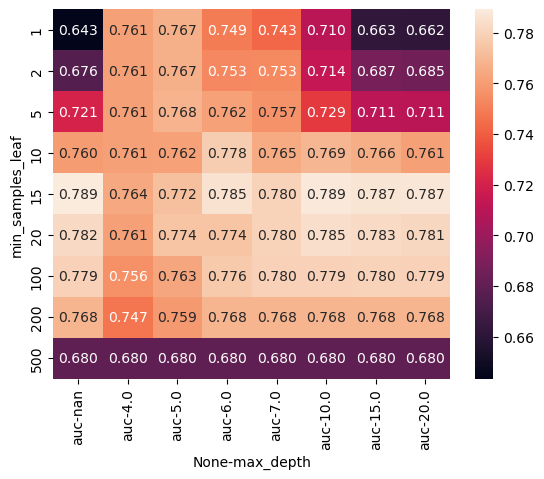

In [50]:
sns.heatmap(df_scores_pivot, annot=True, fmt = '.3f')

## Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
#Each Tree Gets a Random Subset of Features
rf = RandomForestClassifier(n_estimators=10, random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [54]:
y_pred = rf.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

0.7744726453706618

In [55]:
scores = []
for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_pred)

    scores.append((n, auc))

In [56]:
df_scores = pd.DataFrame(scores, columns = ['n_estimators', 'auc'])
df_scores

,n_estimators,auc
0,10,0.774473
1,20,0.802239
2,30,0.811820
3,40,0.813912
4,50,0.815480
5,60,0.814872
6,70,0.816234
7,80,0.815081
8,90,0.815229
9,100,0.815665


Text(0, 0.5, 'AUC')

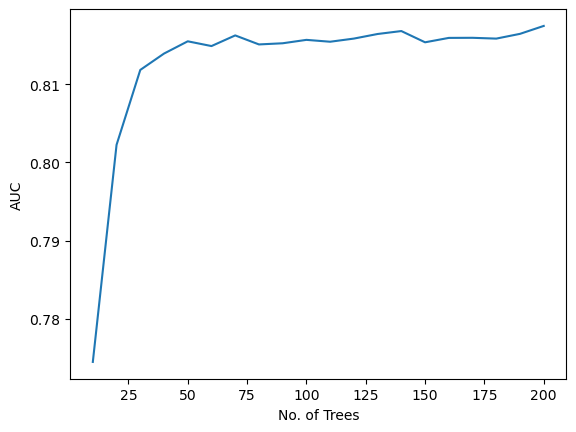

In [57]:
plt.plot(df_scores.n_estimators, df_scores.auc)
plt.xlabel('No. of Trees')
plt.ylabel('AUC')

In [58]:
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(max_depth=d,
                                    n_estimators=n, 
                                    random_state=1)
        rf.fit(X_train, y_train)
    
        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
    
        scores.append((d, n, auc))

In [59]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns = columns)
df_scores.head()

,max_depth,n_estimators,auc
0,5,10,0.787699
1,5,20,0.797731
2,5,30,0.800305
3,5,40,0.799708
4,5,50,0.799878


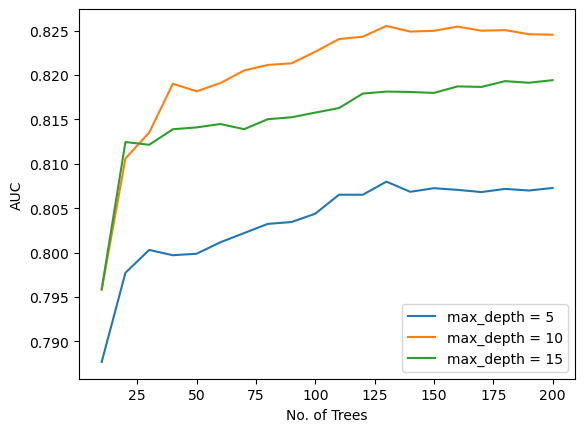

In [60]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset.n_estimators, df_subset.auc, label = f'max_depth = {d}')
    plt.xlabel('No. of Trees')
    plt.ylabel('AUC')
    plt.legend()


In [61]:
max_depth = 10

In [62]:
scores = []

for l in [1, 3, 5, 10, 50]:
        for n in range(10, 201, 10):
            rf = RandomForestClassifier(max_depth=max_depth,
                                        n_estimators=n,
                                        min_samples_leaf=l,
                                        random_state=1)
            rf.fit(X_train, y_train)
        
            y_pred = rf.predict_proba(X_val)[:,1]
            auc = roc_auc_score(y_val, y_pred)
        
            scores.append((l, n, auc))

In [63]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns = columns)
df_scores.head()

,min_samples_leaf,n_estimators,auc
0,1,10,0.795818
1,1,20,0.810597
2,1,30,0.813510
3,1,40,0.819013
4,1,50,0.818160


In [64]:
colours = ['black', 'blue', 'orange', 'red', 'grey']
min_samples_leaf_values = [1, 3, 5, 10, 50]
list(zip(min_samples_leaf_values, colours))

[(1, 'black'), (3, 'blue'), (5, 'orange'), (10, 'red'), (50, 'grey')]

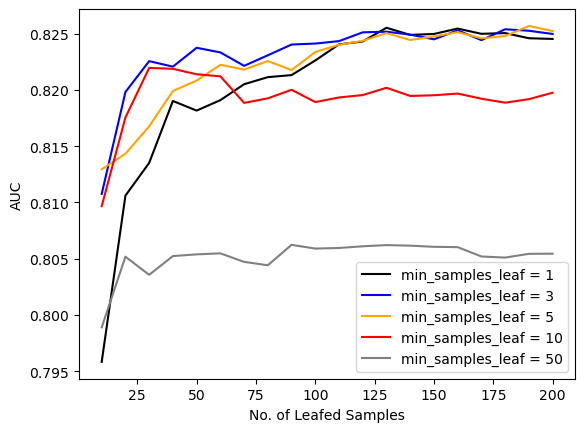

In [65]:
colours = ['black', 'blue', 'orange', 'red', 'grey']
min_samples_leaf_values = [1, 3, 5, 10, 50]


for l, col in zip(min_samples_leaf_values, colours):
    df_subset = df_scores[df_scores.min_samples_leaf == l]
    plt.plot(df_subset.n_estimators, df_subset.auc, label = f'min_samples_leaf = {l}',
            color = col)
    plt.xlabel('No. of Leafed Samples')
    plt.ylabel('AUC')
    plt.legend()


In [66]:
min_samples_leaf = 3

In [67]:
#n_jobs=-1, ensures all available processors are used to train model to speed up process

rf = RandomForestClassifier(n_estimators=100,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            n_jobs = -1,
                            random_state=1)

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_jobs=-1,
                       random_state=1)

## Gradient Boosting and XGBoost

Boosting is when you have multiple models, and each model is trained to correct the errors of the previous model. It is a sequential process, unlike random forest

In [70]:
!pip install xgboost

In [71]:
import xgboost as xgb

In [72]:
features = dv.get_feature_names_out().tolist()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [73]:
xgb_params = {
    'eta': 0.3, #default value
    'max_depth': 6, #default value
    'min_child_weight': 1, #default as binary classification
    
    'objective': 'binary:logistic', #default
    'nthread': 8, #default

    'seed': 1,
    'verbosity': 1, #default
        
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [74]:
y_pred = model.predict(dval)

In [75]:
roc_auc_score(y_val, y_pred)

0.8118506454190986

In [76]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [77]:
%%capture output

xgb_params = {
    'eta': 0.3, #default value
    'max_depth': 6, #default value
    'min_child_weight': 1, #default as binary classification
    
    'objective': 'binary:logistic', #default
    'eval_metric': 'auc',
    
    'nthread': 8, #default
    'seed': 1,
    'verbosity': 1, #default
        
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200, 
                  verbose_eval=5,
                  evals=watchlist)

In [78]:
s = output.stdout
print(s)

[0]	train-auc:0.86653	val-auc:0.77999
[5]	train-auc:0.92969	val-auc:0.80822
[10]	train-auc:0.95512	val-auc:0.81115
[15]	train-auc:0.96767	val-auc:0.81993
[20]	train-auc:0.97648	val-auc:0.81877
[25]	train-auc:0.98248	val-auc:0.81520
[30]	train-auc:0.98844	val-auc:0.81613
[35]	train-auc:0.99244	val-auc:0.81453
[40]	train-auc:0.99393	val-auc:0.81407
[45]	train-auc:0.99568	val-auc:0.81392
[50]	train-auc:0.99723	val-auc:0.81276
[55]	train-auc:0.99804	val-auc:0.81299
[60]	train-auc:0.99861	val-auc:0.81244
[65]	train-auc:0.99916	val-auc:0.81197
[70]	train-auc:0.99962	val-auc:0.81243
[75]	train-auc:0.99975	val-auc:0.81152
[80]	train-auc:0.99989	val-auc:0.81359
[85]	train-auc:0.99993	val-auc:0.81193
[90]	train-auc:0.99998	val-auc:0.81038
[95]	train-auc:0.99999	val-auc:0.80871
[100]	train-auc:0.99999	val-auc:0.80842
[105]	train-auc:1.00000	val-auc:0.80778
[110]	train-auc:1.00000	val-auc:0.80764
[115]	train-auc:1.00000	val-auc:0.80722
[120]	train-auc:1.00000	val-auc:0.80750
[125]	train-auc:1.0000

In [79]:
line = s.split('\n')[0]

In [80]:
line

'[0]\ttrain-auc:0.86653\tval-auc:0.77999'

In [81]:
num_iter, train_auc, val_auc = line.split('\t')

In [82]:
int(num_iter.strip('[]'))

0

In [83]:
float(train_auc.split(':')[1])

0.86653

In [84]:
float(val_auc.split(':')[1])

0.77999

Can do this for every line, convert to DataFrame and then Plot it

In [86]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        
        results.append((it, train, val))

    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [87]:
df_score = parse_xgb_output(output)

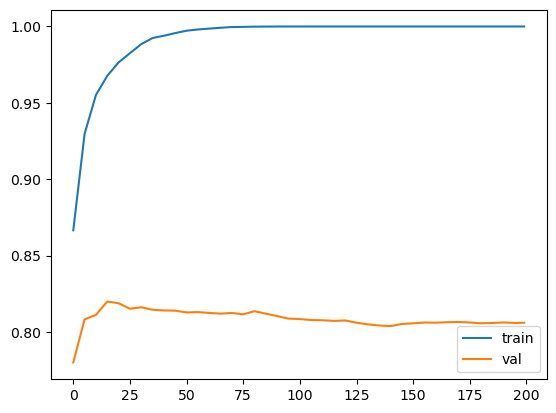

In [88]:
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

Overfitting present

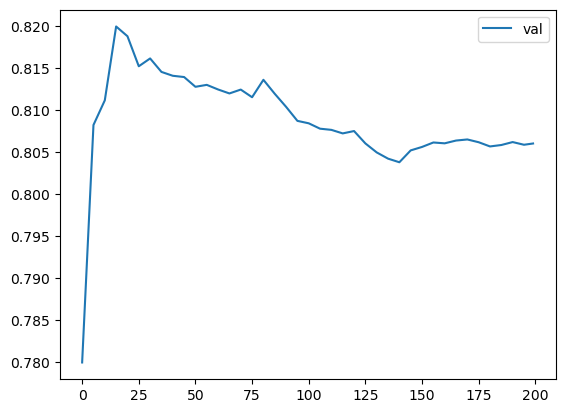

In [90]:
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

## XGBoost Parameter Tuning

Tuning the following parameters:
- `eta`
- `max_depth`
- `min_child_weight`

In [92]:
scores = {}

In [117]:
%%capture output

xgb_params = {
    'eta': 1, 
    'max_depth': 6, 
    'min_child_weight': 1, 
    
    'objective': 'binary:logistic', 
    'eval_metric': 'auc',
    
    'nthread': 8, 
    'seed': 1,
    'verbosity': 1, 
        
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200, 
                  verbose_eval=5,
                  evals=watchlist)

In [119]:
key = f'eta={xgb_params['eta']}'

scores[key] = parse_xgb_output(output)
key

'eta=1'

In [121]:
scores.keys()

dict_keys(['eta=0.1', 'eta=0.01', 'eta=0.05', 'eta=0.3', 'eta=1'])

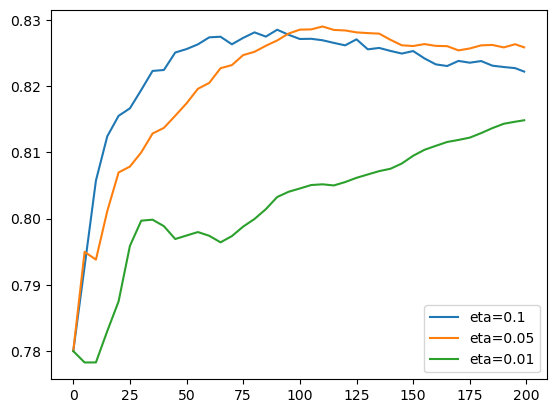

In [123]:
etas = ['eta=0.1', 'eta=0.05', 'eta=0.01']

for eta in etas:
    df_score = scores[eta]
    plt.plot(df_score.num_iter, df_score.val_auc, label=eta)
plt.legend()

0.1 Best ETA

In [191]:
scores ={}

In [205]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 4, 
    'min_child_weight': 1, 
    
    'objective': 'binary:logistic', 
    'eval_metric': 'auc',
    
    'nthread': 8, 
    'seed': 1,
    'verbosity': 1, 
        
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200, 
                  verbose_eval=5,
                  evals=watchlist)

In [207]:
key = f'max_depth={xgb_params['max_depth']}'

scores[key] = parse_xgb_output(output)
key

'max_depth=4'

In [211]:
del scores['max_depth=10']

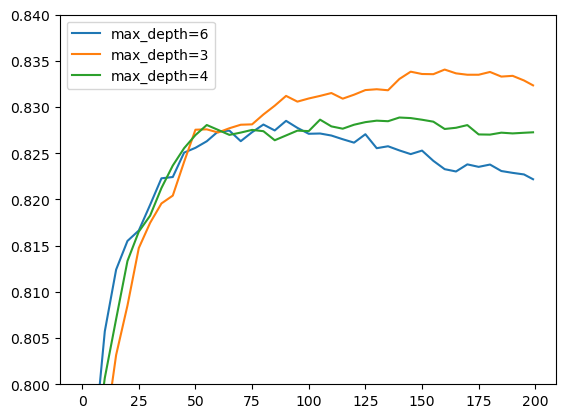

In [217]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)
plt.ylim(0.8, 0.84)
plt.legend()

max_depth = 3

In [232]:
scores ={}

In [253]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 3, 
    'min_child_weight': 30, 
    
    'objective': 'binary:logistic', 
    'eval_metric': 'auc',
    
    'nthread': 8, 
    'seed': 1,
    'verbosity': 1, 
        
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200, 
                  verbose_eval=5,
                  evals=watchlist)

In [255]:
key = f'min_child_weight={xgb_params['min_child_weight']}'

scores[key] = parse_xgb_output(output)
key

'min_child_weight=30'

In [257]:
scores.keys()

dict_keys(['min_child_weight=1', 'min_child_weight=10', 'min_child_weight=13', 'min_child_weight=30'])

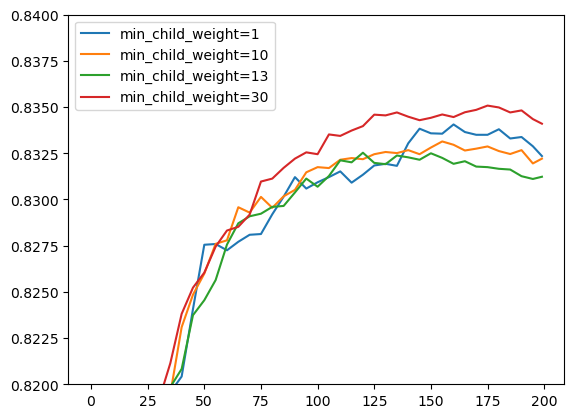

In [259]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)
plt.ylim(0.82, 0.84)
plt.legend()

175 Iterations Looks like the best performance

In [266]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 3, 
    'min_child_weight': 30, 
    
    'objective': 'binary:logistic', 
    'eval_metric': 'auc',
    
    'nthread': 8, 
    'seed': 1,
    'verbosity': 1, 
        
}

model = xgb.train(xgb_params, dtrain, num_boost_round=175)

Other Useful Parameters to Tune:

- `subsample` and `colsample_bytree`
- `lambda` and `alpha`

## Selecting The Final Model

In [273]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

In [275]:
rf = RandomForestClassifier(n_estimators=200,
                            max_depth=10,
                            min_samples_leaf=3,
                            n_jobs = -1,
                            random_state=1)

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200,
                       n_jobs=-1, random_state=1)

In [277]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3, 
    'min_child_weight': 30, 
    
    'objective': 'binary:logistic', 
    'eval_metric': 'auc',
    
    'nthread': 8, 
    'seed': 1,
    'verbosity': 1, 
        
}

model = xgb.train(xgb_params, dtrain, num_boost_round=175)

In [281]:
y_pred = dt.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

0.7850802838390931

In [283]:
y_pred = rf.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

0.8249709379767989

In [287]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.8349852268048726

XGBoost is the best

In [292]:
df_full_train.reset_index(drop=True)

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,22,owner,48,48,married,no_rec,fixed,60,110.0,3000.0,0.0,1000,1460
1,default,8,other,60,41,married,no_rec,freelance,45,62.0,0.0,0.0,1800,2101
2,ok,2,parents,36,19,married,no_rec,fixed,35,162.0,4000.0,100.0,400,570
3,ok,1,owner,12,61,married,no_rec,others,45,103.0,20000.0,0.0,300,650
4,ok,13,owner,60,27,married,no_rec,fixed,35,253.0,7000.0,0.0,1060,1750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3558,default,4,owner,60,47,married,no_rec,freelance,75,0.0,13500.0,0.0,1900,1976
3559,ok,2,rent,60,28,single,no_rec,fixed,45,101.0,0.0,0.0,1300,1333
3560,ok,2,parents,36,25,single,no_rec,fixed,35,110.0,0.0,0.0,500,1200
3561,ok,4,other,60,25,single,no_rec,fixed,35,162.0,0.0,0.0,1800,2999


In [294]:
y_full_train = (df_full_train.status == 'default').astype(int).values

In [298]:
del df_full_train['status']

In [313]:
dicts_full_train = df_full_train.fillna(0).to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)


dicts_test = df_test.fillna(0).to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [321]:
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train,
                    feature_names=dv.get_feature_names_out().tolist())

dtest = xgb.DMatrix(X_test, feature_names=dv.get_feature_names_out().tolist())

In [325]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3, 
    'min_child_weight': 30, 
    
    'objective': 'binary:logistic', 
    'eval_metric': 'auc',
    
    'nthread': 8, 
    'seed': 1,
    'verbosity': 1, 
        
}

model = xgb.train(xgb_params, dfulltrain, num_boost_round=175)

In [327]:
y_pred = model.predict(dtest)

In [329]:
roc_auc_score(y_test, y_pred)

0.8328283075118519